## Requirements


In [1]:
# Directory adjustment
from pathlib import Path
import sys
import os

# Back to main folder
path = os.path.dirname(os.getcwd())+"/"
os.chdir(path)
sys.path.append(path)


In [2]:
# Packges
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from src.TextNormalization import WordRemover
from src.TextVisualization import WordDistPlot
from src.TextDataAnalysis import ColumnsOrder
from src.TextDataAnalysis import NgramsCount
from src.TextDataAnalysis import TextStats
from src.TextDataAnalysis import WordDist


## Preprocessing and augmentation


In [3]:
# Read
df = pd.read_csv('data/corpus_fortuna.csv')
nlp = spacy.load('pt_core_news_sm')

# Augmentation
df['text_nonstop'] = df['text'].apply(lambda x: WordRemover(x))
df['text_lemma'] = df["text_nonstop"].apply(
    lambda x: " ".join([w.lemma_.lower() for w in nlp(x)]))
df = pd.concat([df, TextStats(df)], axis=1)
df = pd.concat([df, TextStats(df, 'text_nonstop')], axis=1)
df = pd.concat([df, TextStats(df, 'text_lemma')], axis=1)
df = ColumnsOrder(df)

# Local save
df.to_csv('data/augmented_corpus_fortuna.csv', index=False)

# View
df.head()


,text_nonstop,text_lemma,text,length_text_nonstop,length_text_lemma,length_text,label,count_word_text_nonstop,count_word_text_lemma,count_word_text
0,cara vive outro mundo nao mundo real refugiado...,caro viver outro mundo nao mundo real refugiad...,nomeusuario o cara vive em outro mundo nao no ...,85,82,124,1,19,19,20
1,incompetentes nao cuidam povo brasileiro pouco...,incompetente nao cuidar povo brasileiro pouco ...,nomeusuario estes incompetentes nao cuidam nem...,69,66,108,0,20,20,20
2,cumpanhero quebraram todas regras,cumpanhero quebrar todo regra,nomeusuario os cumpanhero quebraram todas as r...,33,29,51,0,17,16,18
3,nao conseguem pensar sentido lato alem ve fren...,nao conseguir pensar sentido lato aler ve fren...,nomeusuario e isso nao conseguem pensar no sen...,54,53,97,0,19,18,20
4,bom dia macaco branco haha,bom dia macaco branco haha,nomeusuario bom dia macaco branco haha,26,26,38,1,11,11,14


## Corpus description


In [4]:
# Categories
count = df.value_counts('label').rename_axis('hate_seepch').to_frame('counts')
count['density'] = count['counts']/count['counts'].sum()
count


,counts,density
hate_seepch,,
0,3884,0.685009
1,1786,0.314991


In [5]:
# Superficial numerical analysis
df.groupby('label', as_index=False).mean()


,label,length_text_nonstop,length_text_lemma,length_text,count_word_text_nonstop,count_word_text_lemma,count_word_text
0,0,59.782441,58.699537,89.861483,17.151133,17.010556,19.309990
1,1,63.725084,62.798432,91.834267,17.540873,17.399776,19.174692


### Word distribution - General | Raw


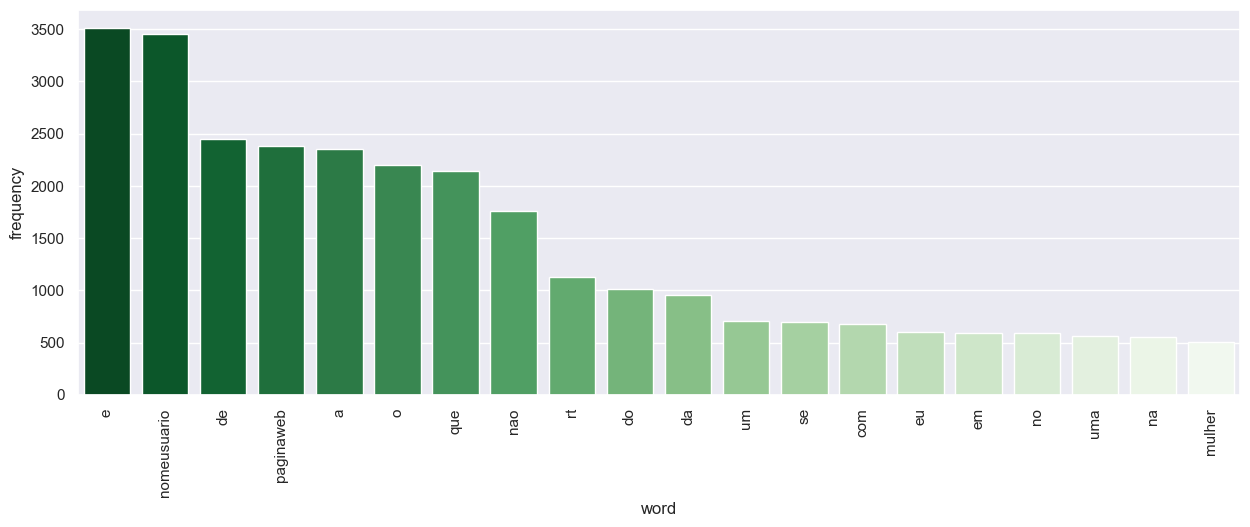

In [6]:
ax = WordDistPlot(WordDist(df))


### Word distribution - General | Preprocessed

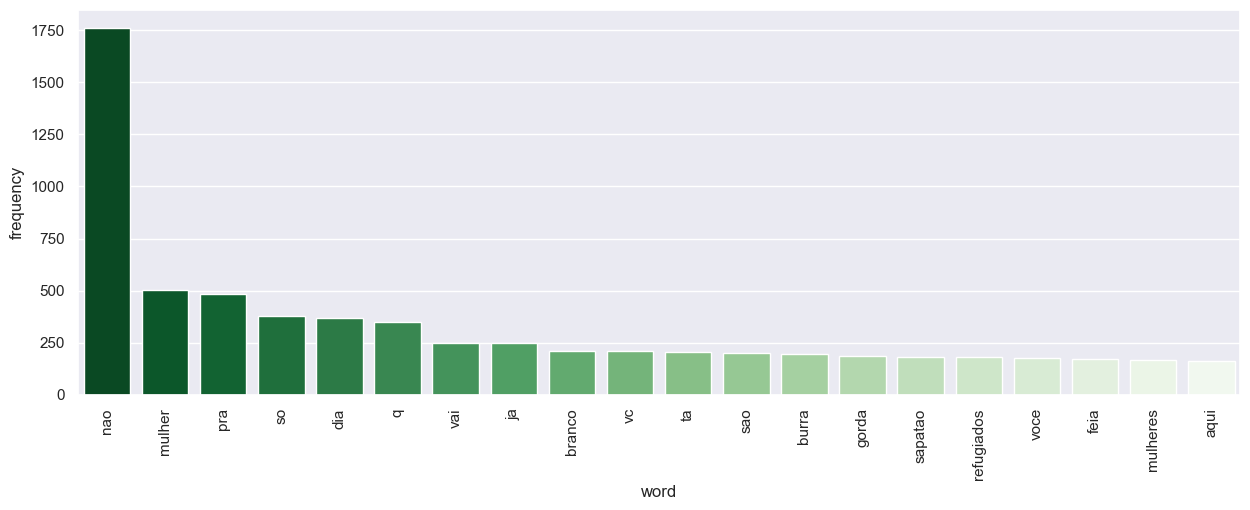

In [7]:
ax = WordDistPlot(WordDist(df, 'text_nonstop'))


### Word distribution - Not hate speech

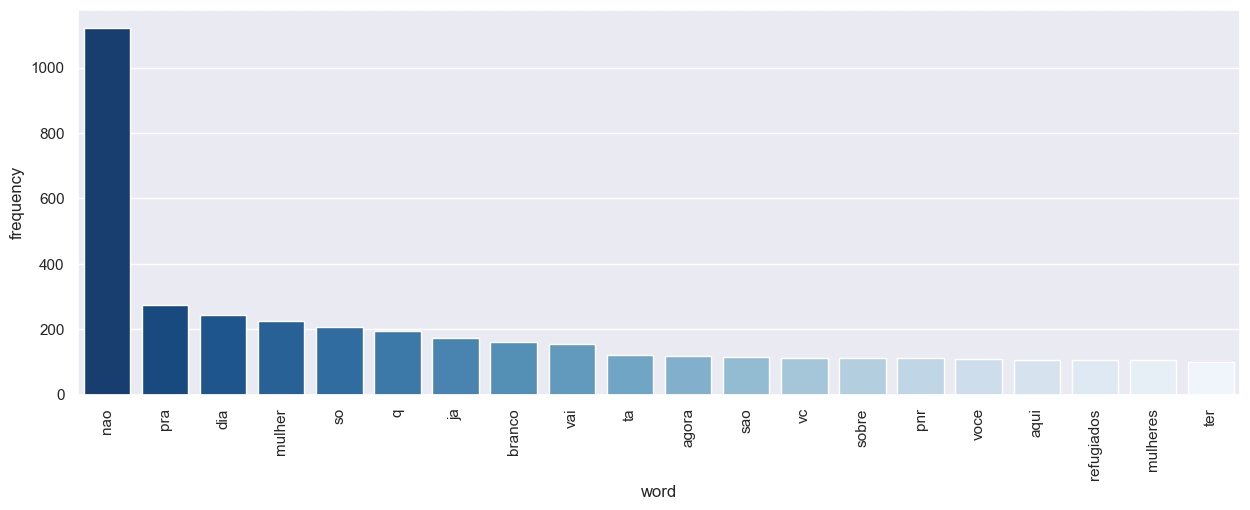

In [8]:
ax = WordDistPlot(WordDist(df.query('label==0'),
                  'text_nonstop'), palette='Blues_r')


### Word distribution -  Hate speech

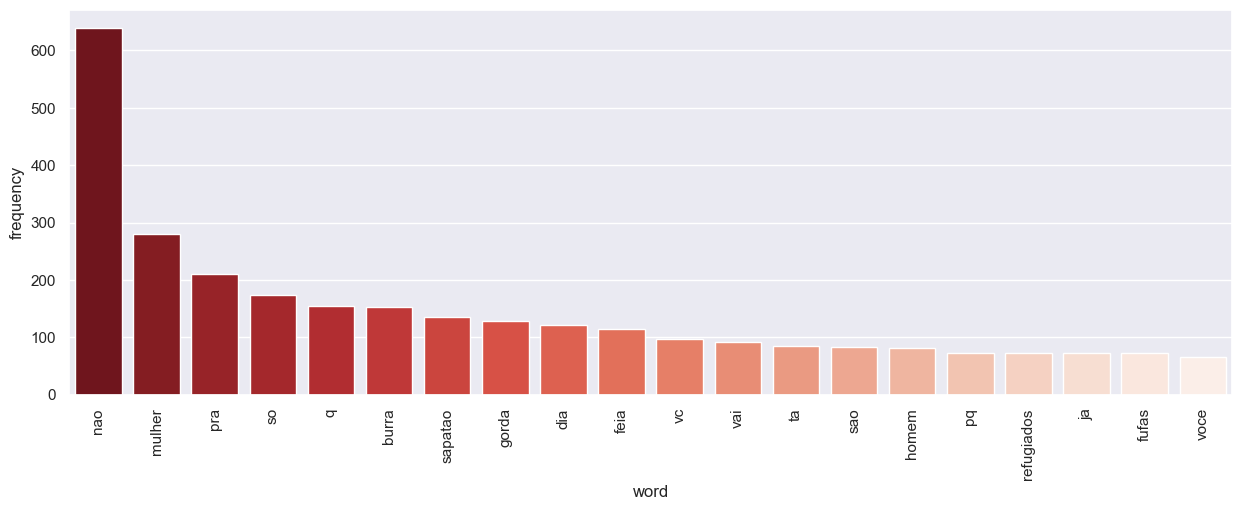

In [9]:
ax = WordDistPlot(WordDist(df.query('label==1'),
                  'text_nonstop'), palette='Reds_r')


### N-grams distribution - General

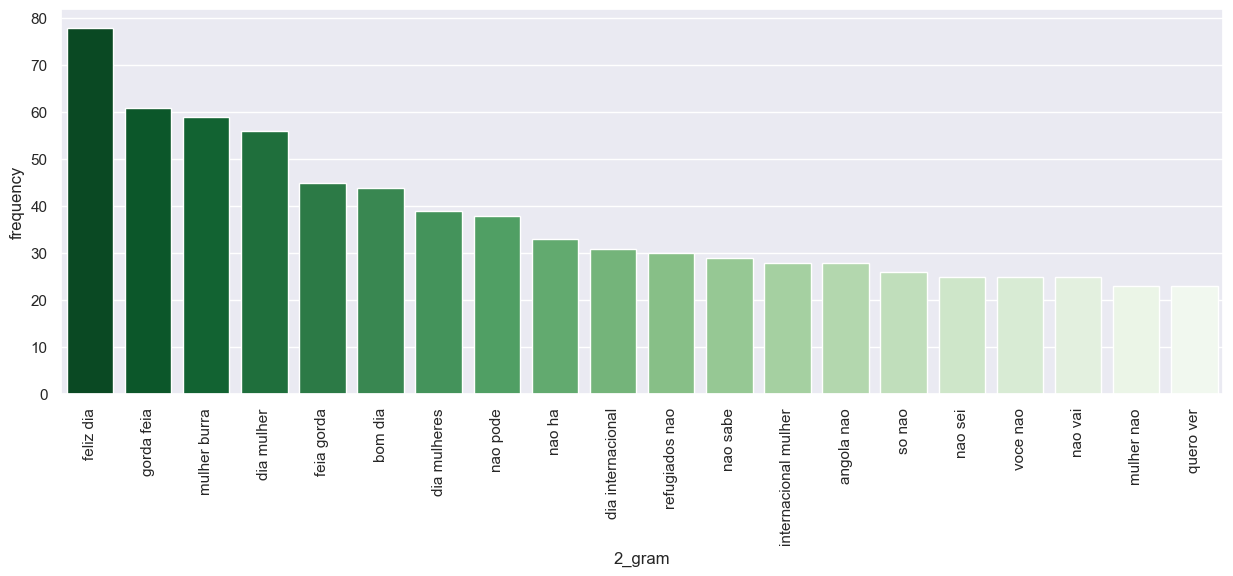

In [10]:
nitems = 2
ngrams = NgramsCount(corpus=df.text_nonstop)
ax = WordDistPlot(ngrams, x=f"{nitems}_gram")


### N-grams Distribution - Not hate speech

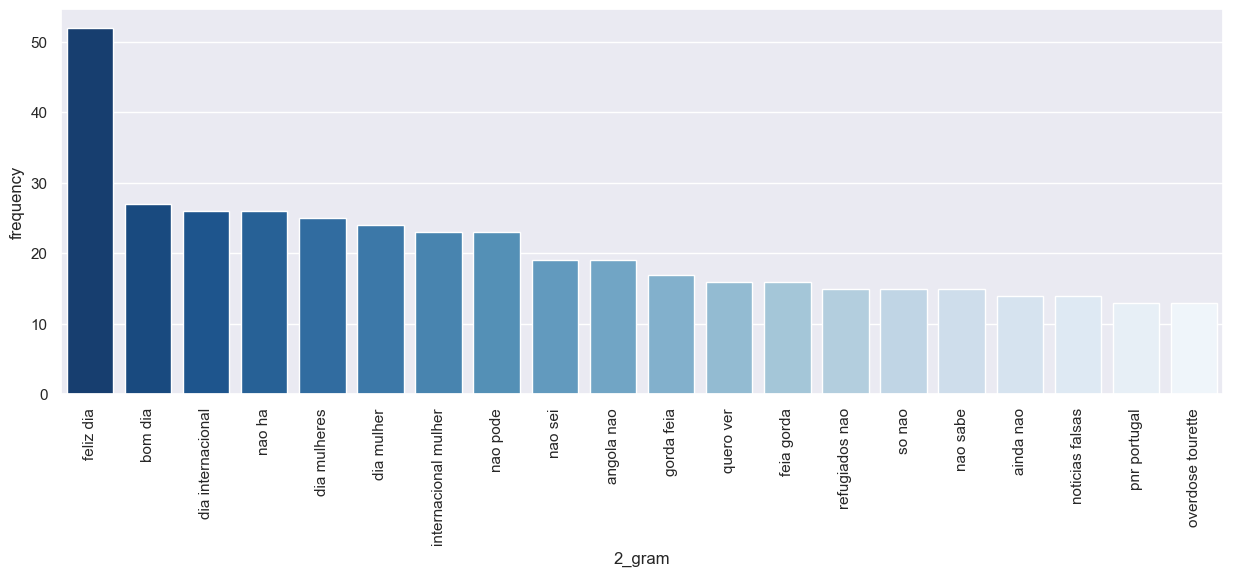

In [11]:

ngrams = NgramsCount(corpus=df.query('label==0').text_nonstop)
ax = WordDistPlot(ngrams, x=f"{nitems}_gram", palette='Blues_r')


### N-grams Distribution - Hate speech

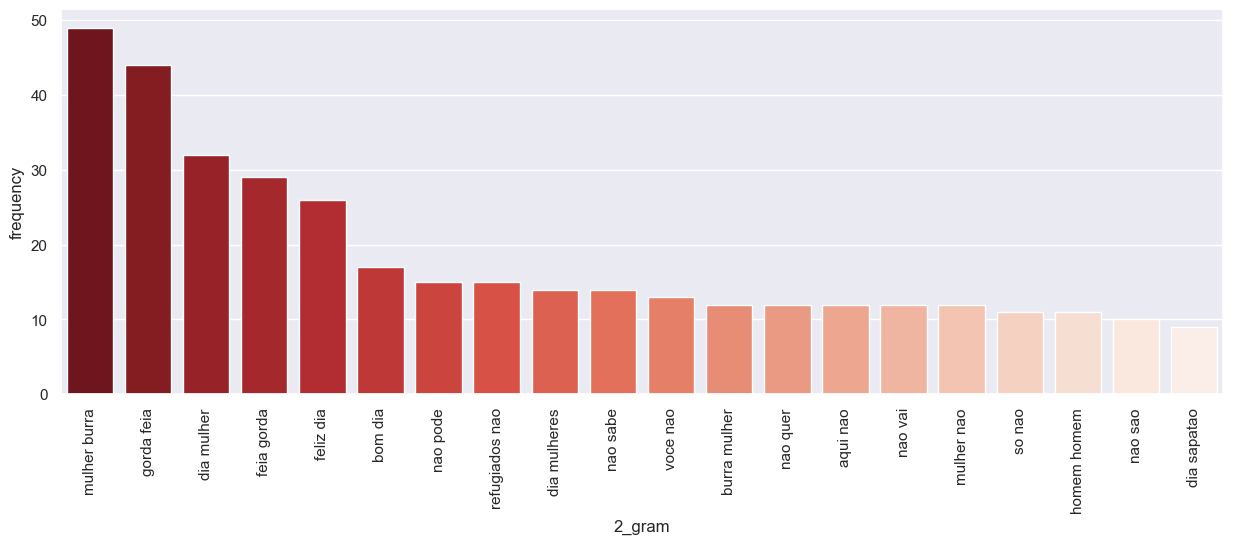

In [12]:
nitems = 2
ngrams = NgramsCount(corpus=df.query('label==1').text_nonstop)
ax = WordDistPlot(ngrams, x=f"{nitems}_gram", palette='Reds_r')
